**Questão 1**

Zeros do sistema: [-1.5]
Polos do sistema: [-1.+2.j -1.-2.j]
CONCLUSÃO: O sistema é ESTÁVEL (todos os polos têm parte real negativa).


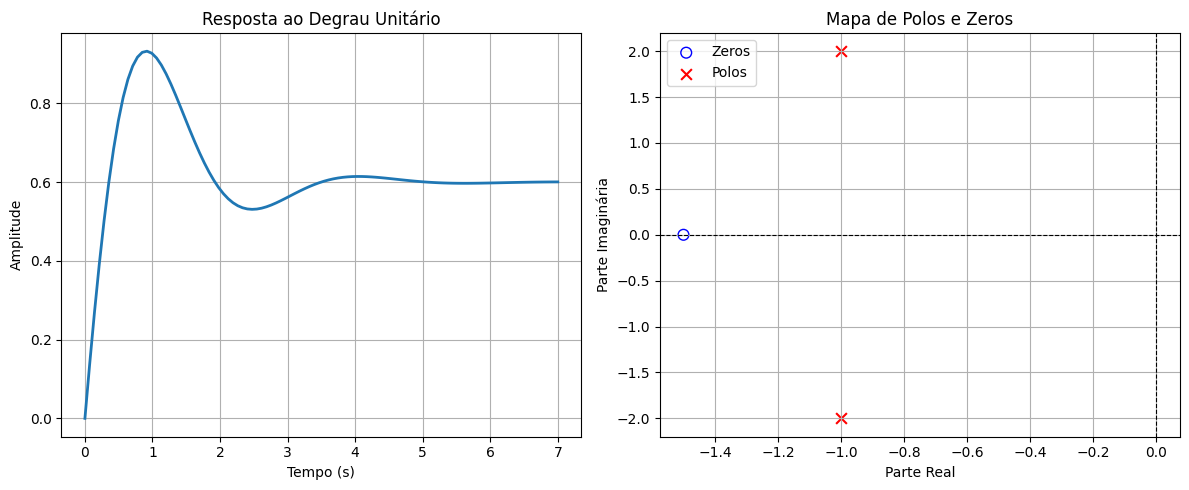

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


num = [2, 3]
den = [1, 2, 5]
sistema = signal.TransferFunction(num, den)

# a)  Resposta ao Degrau

t, y = signal.step(sistema)


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(t, y, linewidth=2)
plt.title('Resposta ao Degrau Unitário')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# b) Diagrama de Polos e Zeros

zeros = sistema.zeros
polos = sistema.poles


plt.subplot(1, 2, 2)

plt.scatter(np.real(zeros), np.imag(zeros), s=60, marker='o', facecolors='none', edgecolors='b', label='Zeros')

plt.scatter(np.real(polos), np.imag(polos), s=60, marker='x', color='r', label='Polos')


plt.axvline(0, color='k', linestyle='--', linewidth=0.8)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)

plt.title('Mapa de Polos e Zeros')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.legend()
plt.grid(True)


print(f"Zeros do sistema: {zeros}")
print(f"Polos do sistema: {polos}")


if np.all(np.real(polos) < 0):
    print("CONCLUSÃO: O sistema é ESTÁVEL (todos os polos têm parte real negativa).")
else:
    print("CONCLUSÃO: O sistema é INSTÁVEL.")

plt.tight_layout()
plt.show()

**Questão 2**

--- Parâmetros Calculados ---
Frequência Natural (wn): 4.0 rad/s
Fator de Amortecimento (zeta): 0.5
Classificação: Subamortecido

--- Especificações Teóricas ---
Tempo de Subida (tr): 0.6046 s
Tempo de Pico (tp): 0.9069 s
Sobressinal (Mp): 16.30 %
Tempo de Acomodação (ts): 1.5000 s

Estabilidade: O sistema é ESTÁVEL (todos os polos no semiplano esquerdo).


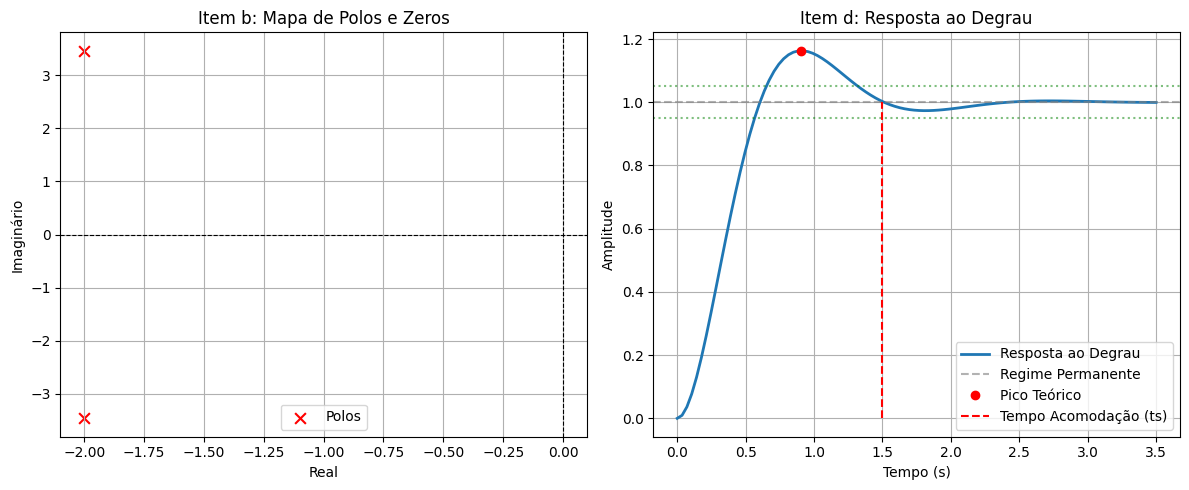

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Definição do Sistema ---
num = [16]
den = [1, 4, 16]
sistema = signal.TransferFunction(num, den)

# --- 2. Cálculos (Item a e c) ---
wn = np.sqrt(16)                 # wn = 4
zeta = 4 / (2 * wn)             
wd = wn * np.sqrt(1 - zeta**2)   

print(f"--- Parâmetros Calculados ---")
print(f"Frequência Natural (wn): {wn} rad/s")
print(f"Fator de Amortecimento (zeta): {zeta}")
print(f"Classificação: {'Subamortecido' if 0 < zeta < 1 else 'Outro'}")


tr = (np.pi - np.arccos(zeta)) / wd
tp = np.pi / wd
Mp_percent = 100 * np.exp(-(zeta * np.pi) / np.sqrt(1 - zeta**2))
ts = 3 / (zeta * wn)  # Critério de 5% 

print(f"\n--- Especificações Teóricas ---")
print(f"Tempo de Subida (tr): {tr:.4f} s")
print(f"Tempo de Pico (tp): {tp:.4f} s")
print(f"Sobressinal (Mp): {Mp_percent:.2f} %")
print(f"Tempo de Acomodação (ts): {ts:.4f} s")

# --- 3. Gráficos (Item b e d) ---
plt.figure(figsize=(12, 5))

# item B
plt.subplot(1, 2, 1)

polos = sistema.poles
zeros = sistema.zeros 

plt.scatter(np.real(polos), np.imag(polos), s=60, marker='x', color='r', label='Polos')
if len(zeros) > 0:
    plt.scatter(np.real(zeros), np.imag(zeros), s=60, marker='o', facecolors='none', edgecolors='b', label='Zeros')

plt.axvline(0, color='k', linestyle='--', linewidth=0.8)
plt.axhline(0, color='k', linestyle='--', linewidth=0.8)
plt.title('Item b: Mapa de Polos e Zeros')
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.legend()
plt.grid(True)


if np.all(np.real(polos) < 0):
    print("\nEstabilidade: O sistema é ESTÁVEL (todos os polos no semiplano esquerdo).")

#Item D
plt.subplot(1, 2, 2)
t, y = signal.step(sistema)
plt.plot(t, y, linewidth=2, label='Resposta ao Degrau')


y_final = 1.0 
peak_val = 1 + (Mp_percent/100)

plt.axhline(y_final, color='gray', linestyle='--', alpha=0.6, label='Regime Permanente')
plt.axhline(y_final * 1.05, color='green', linestyle=':', alpha=0.5) # Limite 5% superior
plt.axhline(y_final * 0.95, color='green', linestyle=':', alpha=0.5) # Limite 5% inferior


plt.plot(tp, peak_val, 'ro', label='Pico Teórico')
plt.plot([ts, ts], [0, y_final], 'r--', label='Tempo Acomodação (ts)')

plt.title('Item d: Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')
plt.grid(True)

plt.tight_layout()
plt.show()

**Questão 3**

--- Parâmetros de Segunda Ordem ---
Zeta calculado: 0.4559
Wn calculado:   7.6563 rad/s

--- Ganhos do Controlador ---
Kp: 58.6184
Kd: 0.1020


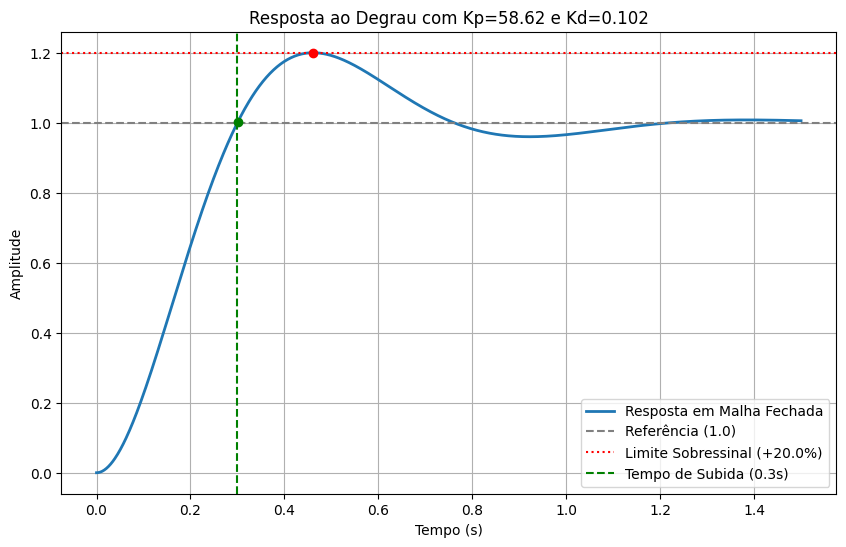


--- Verificação da Simulação ---
Sobressinal medido: 20.00%
Tempo de subida medido (aprox): 0.3003 s


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# --- 1. Especificações do Projeto ---
Mp_target = 0.20  # 20% de sobressinal
tr_target = 0.3   

# --- 2. Cálculos dos Parâmetros (zeta e wn) ---
ln_Mp = np.log(Mp_target)
zeta = np.sqrt( (ln_Mp**2) / (np.pi**2 + ln_Mp**2) )


wd_norm = np.sqrt(1 - zeta**2)
wn = (np.pi - np.arccos(zeta)) / (tr_target * wd_norm)

print(f"--- Parâmetros de Segunda Ordem ---")
print(f"Zeta calculado: {zeta:.4f}")
print(f"Wn calculado:   {wn:.4f} rad/s")


Kp = wn**2
Kd = (2 * zeta * wn - 1) / Kp

print(f"\n--- Ganhos do Controlador ---")
print(f"Kp: {Kp:.4f}")
print(f"Kd: {Kd:.4f}")


num = [Kp]
den = [1, (1 + Kp * Kd), Kp]
sistema_mf = signal.TransferFunction(num, den)

# com o degrau
t = np.linspace(0, 1.5, 1000)
t, y = signal.step(sistema_mf, T=t)


plt.figure(figsize=(10, 6))
plt.plot(t, y, linewidth=2, label='Resposta em Malha Fechada')


plt.axhline(1.0, color='gray', linestyle='--', label='Referência (1.0)')
plt.axhline(1.0 + Mp_target, color='r', linestyle=':', label=f'Limite Sobressinal (+{Mp_target*100}%)')
plt.axvline(tr_target, color='g', linestyle='--', label=f'Tempo de Subida ({tr_target}s)')


pico_idx = np.argmax(y)
plt.plot(t[pico_idx], y[pico_idx], 'ro')

cruzamento_idx = np.where(y >= 1.0)[0][0]
plt.plot(t[cruzamento_idx], y[cruzamento_idx], 'go')

plt.title(f'Resposta ao Degrau com Kp={Kp:.2f} e Kd={Kd:.3f}')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


print(f"\n--- Verificação da Simulação ---")
print(f"Sobressinal medido: {(np.max(y)-1)*100:.2f}%")
print(f"Tempo de subida medido (aprox): {t[cruzamento_idx]:.4f} s")

**Questão 4**

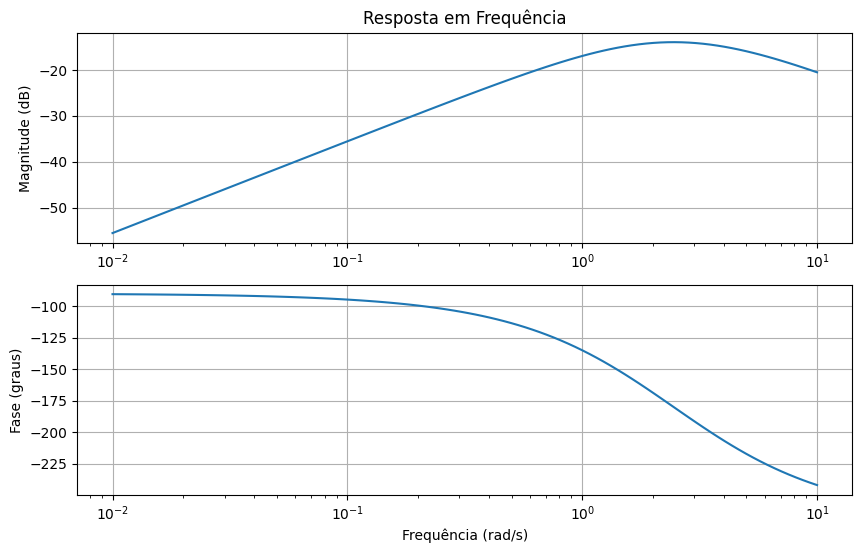

In [11]:
# H(s) = -s / (s^2 + 5s + 6)
num4 = [-1, 0] # -1*s + 0
den4 = [1, 5, 6]
sys4 = signal.TransferFunction(num4, den4)

w, mag, phase = signal.bode(sys4)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(w, mag) 
plt.title('Resposta em Frequência')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.semilogx(w, phase) 
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.grid(True)
plt.show()

**é um sistema passa faixa**

**Questão 5**

**A)
y(t)=[m(t)+cos(2πfct)]+12[m(t)+cos(2πfct)]2**

**[m(t)+cos(2πfct)]2=m2(t)+2m(t)cos(2πfct)+cos2(2πfct)**
**y(t)=m(t)+12m2(t)+14+[1+m(t)]cos(2πfct)+14cos(4πfct)**

**B)**
**sAM(t)=[1+m(t)]cos(2πfct)**


**Frequência central: 10KHz Largura de Banda: 2B = 2KHz**

**código**

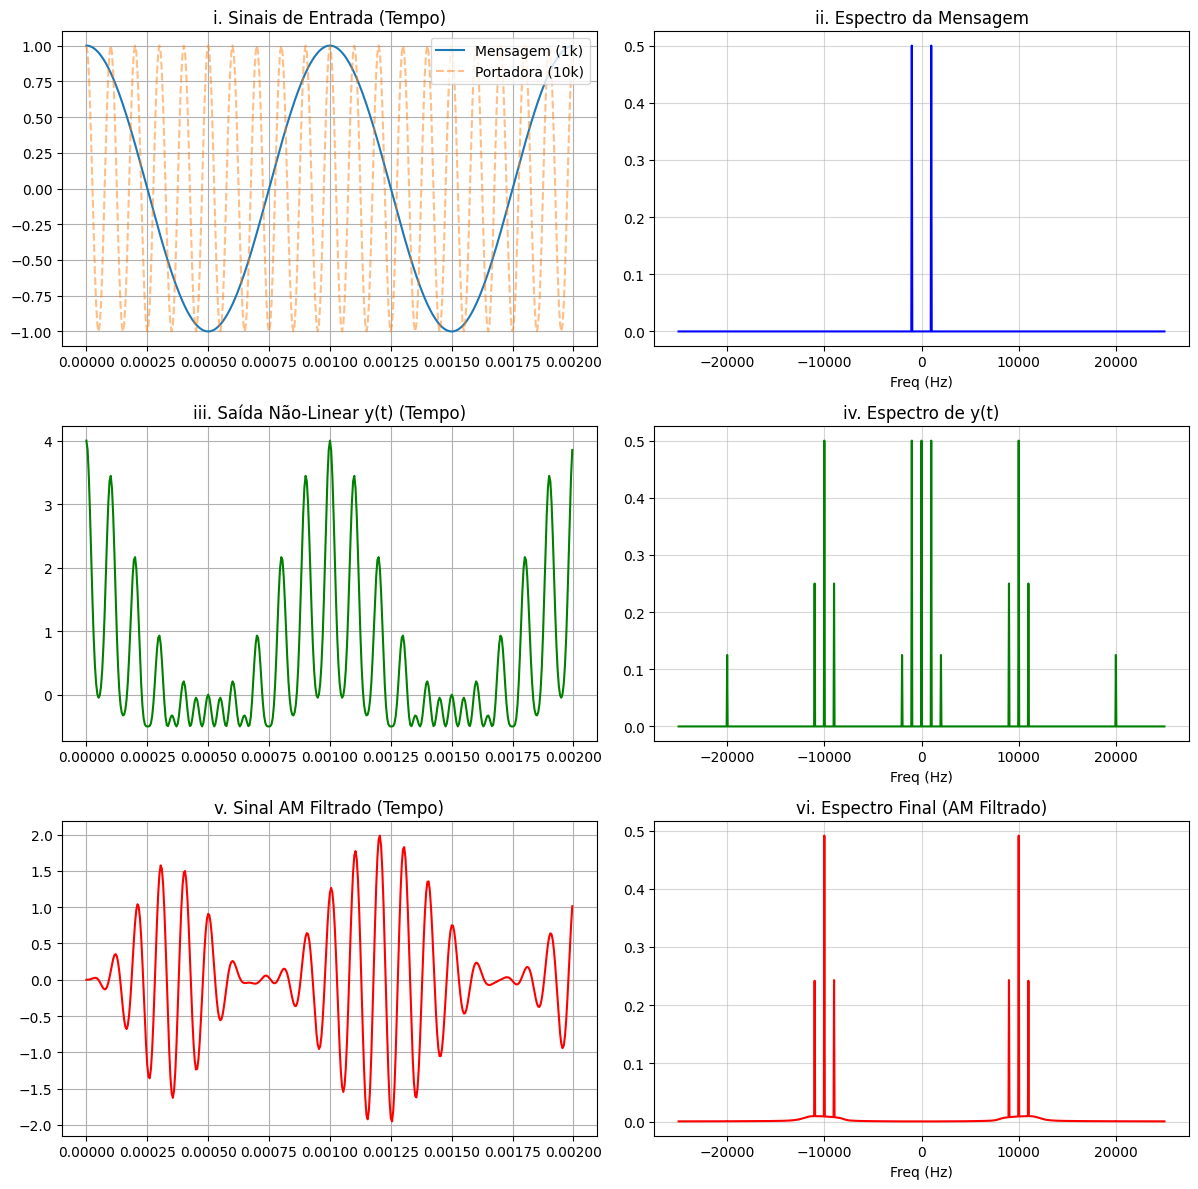

In [14]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

fm = 1000
fc = 10000
fs = 200000
duracao = 0.02

t = np.arange(0, duracao, 1/fs)

mt = np.cos(2 * np.pi * fm * t)
ct = np.cos(2 * np.pi * fc * t)

xt = mt + ct
yt = xt + 0.5 * (xt**2)

nyquist = 0.5 * fs
baixa = 8000 / nyquist
alta = 12000 / nyquist
b, a = signal.butter(4, [baixa, alta], btype='bandpass')

y_am_filtrado = signal.lfilter(b, a, yt)

def plot_spec(sig, fs, ax, title, color='blue'):
    N = len(sig)
    Y = fft.fft(sig)
    freqs = fft.fftfreq(N, 1/fs)

    Y_shift = fft.fftshift(Y)
    freqs_shift = fft.fftshift(freqs)

    mag = np.abs(Y_shift) / N

    mask = (freqs_shift >= -25000) & (freqs_shift <= 25000)

    ax.plot(freqs_shift[mask], mag[mask], color=color)
    ax.set_title(title)
    ax.set_xlabel("Freq (Hz)")
    ax.grid(True, alpha=0.5)

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

limit = int(0.002 * fs)

axs[0, 0].plot(t[:limit], mt[:limit], label='Mensagem (1k)')
axs[0, 0].plot(t[:limit], ct[:limit], label='Portadora (10k)', alpha=0.5, linestyle='--')
axs[0, 0].set_title('i. Sinais de Entrada (Tempo)')
axs[0, 0].legend(loc='upper right')
axs[0, 0].grid(True)

plot_spec(mt, fs, axs[0, 1], 'ii. Espectro da Mensagem')

axs[1, 0].plot(t[:limit], yt[:limit], color='green')
axs[1, 0].set_title('iii. Saída Não-Linear y(t) (Tempo)')
axs[1, 0].grid(True)

plot_spec(yt, fs, axs[1, 1], 'iv. Espectro de y(t)', color='green')

axs[2, 0].plot(t[:limit], y_am_filtrado[:limit], color='red')
axs[2, 0].set_title('v. Sinal AM Filtrado (Tempo)')
axs[2, 0].grid(True)

plot_spec(y_am_filtrado, fs, axs[2, 1], 'vi. Espectro Final (AM Filtrado)', color='red')

plt.tight_layout()
plt.show()

**Questão 6**

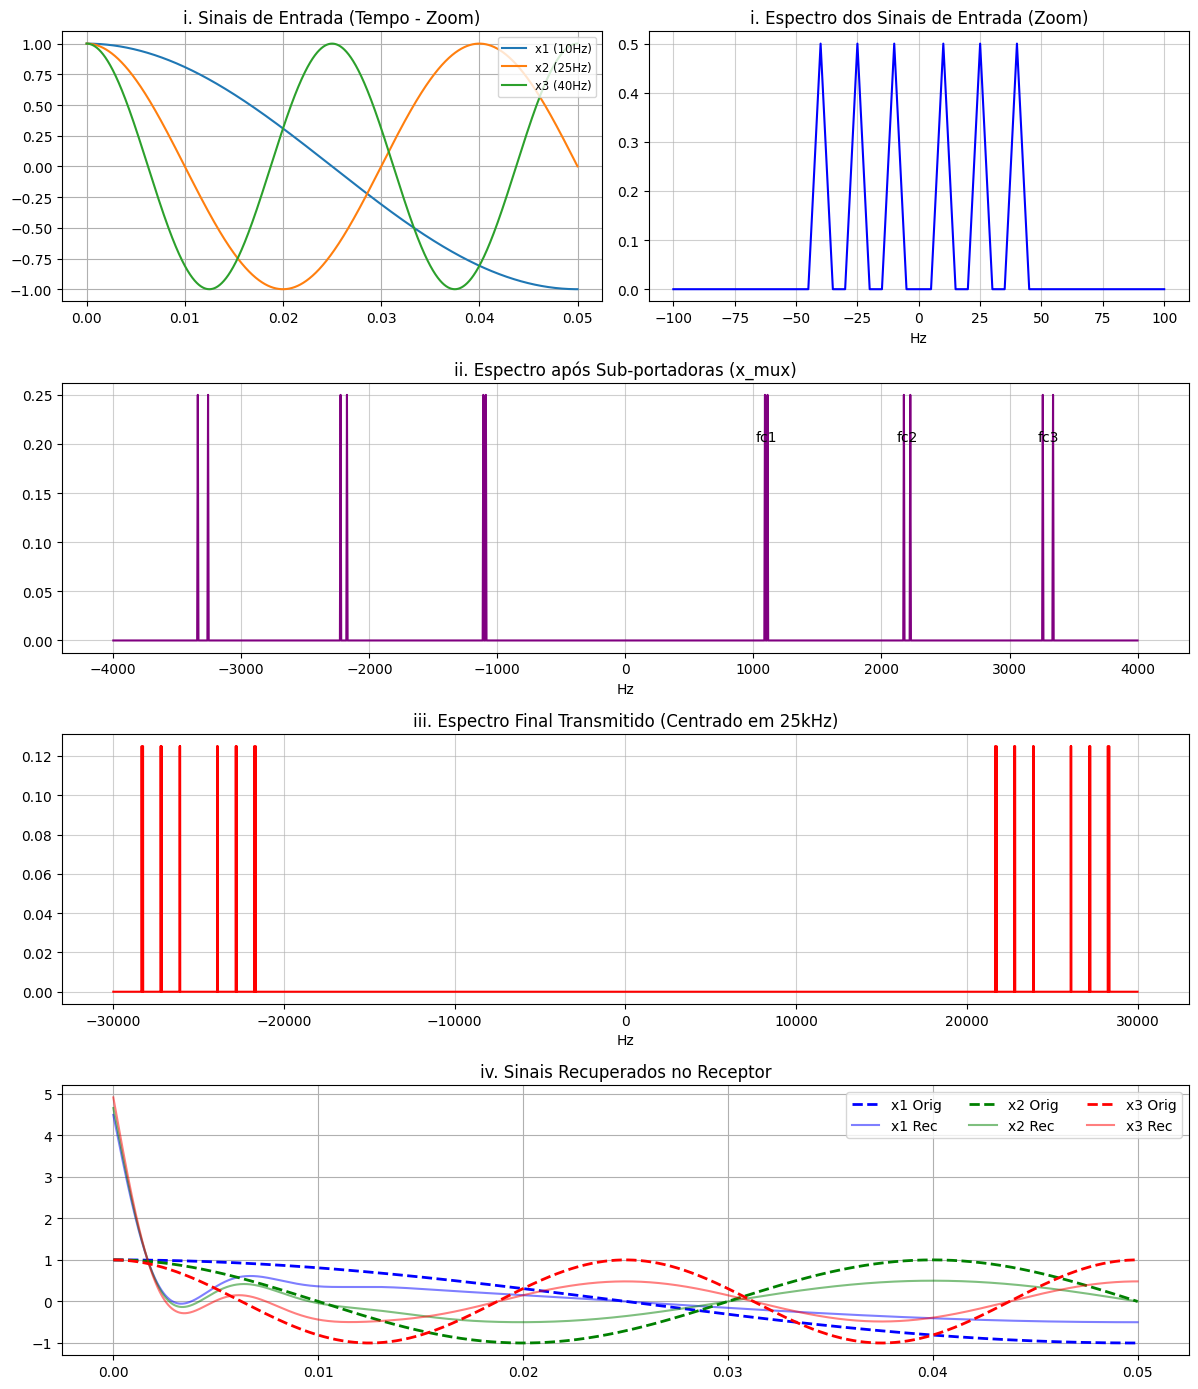

In [21]:
import numpy as np
import scipy.signal as signal
import scipy.fft as fft
import matplotlib.pyplot as plt

f1 = 10
f2 = 25
f3 = 40

fc1 = 1100
fc2 = 2200
fc3 = 3300

fc_main = 25000

fs = 400000
duration = 0.2
t = np.arange(0, duration, 1/fs)

x1 = np.cos(2 * np.pi * f1 * t)
x2 = np.cos(2 * np.pi * f2 * t)
x3 = np.cos(2 * np.pi * f3 * t)

mod1 = x1 * np.cos(2 * np.pi * fc1 * t)
mod2 = x2 * np.cos(2 * np.pi * fc2 * t)
mod3 = x3 * np.cos(2 * np.pi * fc3 * t)

x_mux = mod1 + mod2 + mod3

s_transimitido = x_mux * np.cos(2 * np.pi * fc_main * t)

s_demod_main_raw = s_transimitido * np.cos(2 * np.pi * fc_main * t)

nyq = 0.5 * fs
b_main, a_main = signal.butter(4, 5000/nyq, btype='low')
x_mux_recuperado = signal.filtfilt(b_main, a_main, s_demod_main_raw)

b_final, a_final = signal.butter(4, 150/nyq, btype='low')

rec1_raw = x_mux_recuperado * np.cos(2 * np.pi * fc1 * t)
x1_rec = 2 * signal.filtfilt(b_final, a_final, rec1_raw) # *2 para corrigir amplitude DSB

rec2_raw = x_mux_recuperado * np.cos(2 * np.pi * fc2 * t)
x2_rec = 2 * signal.filtfilt(b_final, a_final, rec2_raw)

rec3_raw = x_mux_recuperado * np.cos(2 * np.pi * fc3 * t)
x3_rec = 2 * signal.filtfilt(b_final, a_final, rec3_raw)

def plot_spec(sig, fs, ax, title, limit_axis=None, color='blue'):
    N = len(sig)
    Y = fft.fft(sig)
    Y = fft.fftshift(Y)
    freqs = fft.fftfreq(N, 1/fs)
    freqs = fft.fftshift(freqs)
    mag = np.abs(Y) / N

    if limit_axis:
        mask = (freqs >= -limit_axis) & (freqs <= limit_axis)
        ax.plot(freqs[mask], mag[mask], color=color)
    else:
        ax.plot(freqs, mag, color=color)

    ax.set_title(title)
    ax.set_xlabel("Hz")
    ax.grid(True, alpha=0.6)

plt.figure(figsize=(12, 14))
plt.subplots_adjust(hspace=0.5)

plt.subplot(4, 2, 1)
plt.plot(t[:20000], x1[:20000], label='x1 (10Hz)') # Zoom
plt.plot(t[:20000], x2[:20000], label='x2 (25Hz)')
plt.plot(t[:20000], x3[:20000], label='x3 (40Hz)')
plt.title("i. Sinais de Entrada (Tempo - Zoom)")
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)

ax2 = plt.subplot(4, 2, 2)
plot_spec(x1+x2+x3, fs, ax2, "i. Espectro dos Sinais de Entrada (Zoom)", limit_axis=100)

ax3 = plt.subplot(4, 1, 2)

plot_spec(x_mux, fs, ax3, "ii. Espectro após Sub-portadoras (x_mux)", limit_axis=4000, color='purple')
ax3.text(1100, 0.2, 'fc1', ha='center', va='bottom')
ax3.text(2200, 0.2, 'fc2', ha='center', va='bottom')
ax3.text(3300, 0.2, 'fc3', ha='center', va='bottom')

ax4 = plt.subplot(4, 1, 3)
plot_spec(s_transimitido, fs, ax4, "iii. Espectro Final Transmitido (Centrado em 25kHz)", limit_axis=30000, color='red')

plt.subplot(4, 1, 4)
plt.plot(t[:20000], x1[:20000], 'b--', linewidth=2, label='x1 Orig')
plt.plot(t[:20000], x1_rec[:20000], 'b', alpha=0.5, label='x1 Rec')

plt.plot(t[:20000], x2[:20000], 'g--', linewidth=2, label='x2 Orig')
plt.plot(t[:20000], x2_rec[:20000], 'g', alpha=0.5, label='x2 Rec')

plt.plot(t[:20000], x3[:20000], 'r--', linewidth=2, label='x3 Orig')
plt.plot(t[:20000], x3_rec[:20000], 'r', alpha=0.5, label='x3 Rec')

plt.title("iv. Sinais Recuperados no Receptor")
plt.legend(loc='upper right', ncol=3)
plt.grid(True)

plt.tight_layout()
plt.show()